In [1]:
import matplotlib
import matplotlib.pyplot as plt

# 한글 폰트 설정 (윈도우 기준: 맑은고딕)
matplotlib.rc('font', family='Malgun Gothic')

# 마이너스 기호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

=== 이진 분류모델 성능평가 ===
              precision    recall  f1-score   support

           0       0.59      0.63      0.61       578
           1       0.81      0.78      0.80      1161

    accuracy                           0.73      1739
   macro avg       0.70      0.71      0.70      1739
weighted avg       0.74      0.73      0.74      1739



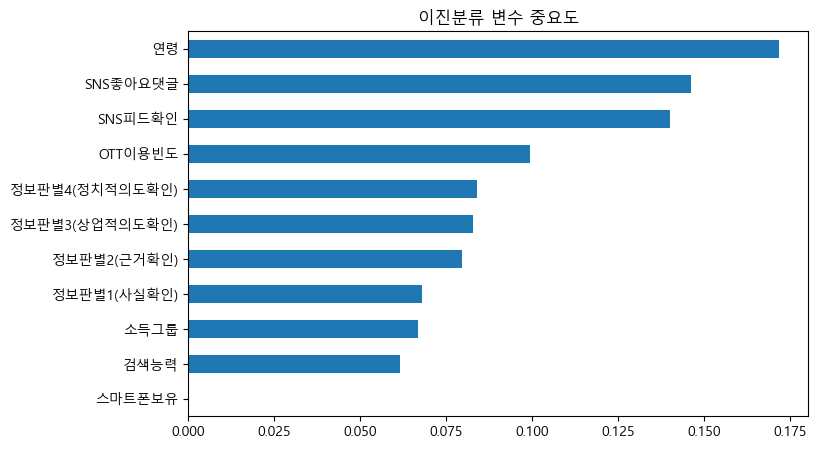

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 1️⃣ 데이터 불러오기 (최종 이진라벨 포함)
df = pd.read_csv("p24_final_labeled_binary.csv", encoding='utf-8-sig')
df = df.dropna(subset=['소외이진라벨'])

# 2️⃣ X, y 설정
X = df[[
    '검색능력', '정보판별1(사실확인)', '정보판별2(근거확인)',
    '정보판별3(상업적의도확인)', '정보판별4(정치적의도확인)',
    'SNS피드확인', 'SNS좋아요댓글', 'OTT이용빈도',
    '스마트폰보유', '소득그룹', '연령'
]]
y = df['소외이진라벨']

# 3️⃣ Train-Test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4️⃣ SMOTE 오버샘플링 적용 (결측 제거 후 진행)
X_train_no_na = X_train.dropna()
y_train_no_na = y_train.loc[X_train_no_na.index]

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_no_na, y_train_no_na)

# 5️⃣ 랜덤포레스트 (클래스 가중치 balanced 적용)
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

# 6️⃣ 예측 및 평가
y_pred = model.predict(X_test)
print("=== 이진 분류모델 성능평가 ===")
print(classification_report(y_test, y_pred))

# 7️⃣ 변수 중요도 시각화
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feat_importance.plot(kind='barh')
plt.title("이진분류 변수 중요도")
plt.gca().invert_yaxis()
plt.show()

=== 이진 분류모델 성능평가 ===
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       578
           1       0.80      0.78      0.79      1161

    accuracy                           0.72      1739
   macro avg       0.69      0.70      0.69      1739
weighted avg       0.73      0.72      0.73      1739



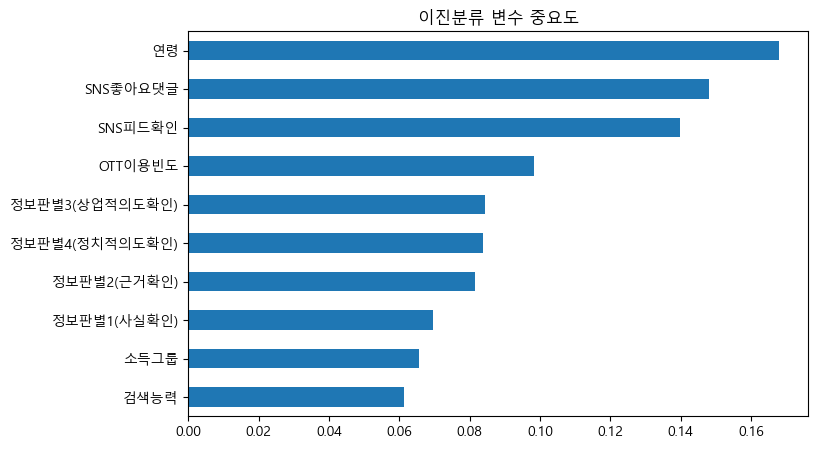

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 1️⃣ 데이터 불러오기 (최종 이진라벨 포함)
df = pd.read_csv("p24_final_labeled_binary.csv", encoding='utf-8-sig')
df = df.dropna(subset=['소외이진라벨'])

# 2️⃣ X, y 설정
X = df[[
    '검색능력', '정보판별1(사실확인)', '정보판별2(근거확인)',
    '정보판별3(상업적의도확인)', '정보판별4(정치적의도확인)',
    'SNS피드확인', 'SNS좋아요댓글', 'OTT이용빈도',
     '소득그룹', '연령'
]]
y = df['소외이진라벨']

# 3️⃣ Train-Test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4️⃣ SMOTE 오버샘플링 적용 (결측 제거 후 진행)
X_train_no_na = X_train.dropna()
y_train_no_na = y_train.loc[X_train_no_na.index]

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_no_na, y_train_no_na)

# 5️⃣ 랜덤포레스트 (클래스 가중치 balanced 적용)
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

# 6️⃣ 예측 및 평가
y_pred = model.predict(X_test)
print("=== 이진 분류모델 성능평가 ===")
print(classification_report(y_test, y_pred))

# 7️⃣ 변수 중요도 시각화
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feat_importance.plot(kind='barh')
plt.title("이진분류 변수 중요도")
plt.gca().invert_yaxis()
plt.show()

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# 1️⃣ 데이터 불러오기 (이진라벨)
df = pd.read_csv("p24_final_labeled_binary.csv", encoding='utf-8-sig')
df = df.dropna(subset=['소외이진라벨'])

# 2️⃣ X, y 설정
X = df[[
    '검색능력', '정보판별1(사실확인)', '정보판별2(근거확인)',
    '정보판별3(상업적의도확인)', '정보판별4(정치적의도확인)',
    'SNS피드확인', 'SNS좋아요댓글', 'OTT이용빈도',
     '소득그룹', '연령'
]]
y = df['소외이진라벨']

# 3️⃣ Train-Test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4️⃣ SMOTE 적용 (결측 제거)
X_train_no_na = X_train.dropna()
y_train_no_na = y_train.loc[X_train_no_na.index]

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_no_na, y_train_no_na)

# 5️⃣ Grid Search 튜닝 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    cv=5,  # 교차검증 5폴드
    scoring='f1_macro',
    n_jobs=-1
)

# 6️⃣ 튜닝 수행
grid_search.fit(X_train_resampled, y_train_resampled)

# 7️⃣ 최적 파라미터 확인
print("최적 파라미터:", grid_search.best_params_)

# 8️⃣ 최적모델 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("=== 튜닝 후 이진 분류모델 성능 ===")
print(classification_report(y_test, y_pred))


최적 파라미터: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
=== 튜닝 후 이진 분류모델 성능 ===
              precision    recall  f1-score   support

           0       0.59      0.62      0.60       578
           1       0.81      0.78      0.79      1161

    accuracy                           0.73      1739
   macro avg       0.70      0.70      0.70      1739
weighted avg       0.73      0.73      0.73      1739



In [6]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\windo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# 1️⃣ 데이터 불러오기
df = pd.read_csv("p24_final_labeled_binary.csv", encoding='utf-8-sig')
df = df.dropna(subset=['소외이진라벨'])

# 2️⃣ X, y 설정
X = df[[
    '검색능력', '정보판별1(사실확인)', '정보판별2(근거확인)',
    '정보판별3(상업적의도확인)', '정보판별4(정치적의도확인)',
    'SNS피드확인', 'SNS좋아요댓글', 'OTT이용빈도',
     '소득그룹', '연령'
]]
y = df['소외이진라벨']

# 3️⃣ Train-Test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4️⃣ SMOTE 오버샘플링 적용 (결측 제거 후 적용)
X_train_no_na = X_train.dropna()
y_train_no_na = y_train.loc[X_train_no_na.index]

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_no_na, y_train_no_na)

# 5️⃣ 테스트셋도 결측 제거 (공정비교용)
X_test_no_na = X_test.dropna()
y_test_no_na = y_test.loc[X_test_no_na.index]

# 6️⃣ RandomForest (튜닝 파라미터 반영)
rf_model = RandomForestClassifier(
    n_estimators=300, max_depth=None, min_samples_split=10,
    class_weight='balanced', random_state=42
)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test_no_na)
print("=== Random Forest (튜닝) ===")
print(classification_report(y_test_no_na, y_pred_rf))

# 7️⃣ Logistic Regression
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train_resampled, y_train_resampled)
y_pred_log = log_model.predict(X_test_no_na)
print("=== Logistic Regression ===")
print(classification_report(y_test_no_na, y_pred_log))

# 8️⃣ XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test_no_na)
print("=== XGBoost ===")
print(classification_report(y_test_no_na, y_pred_xgb))

=== Random Forest (튜닝) ===
              precision    recall  f1-score   support

           0       0.62      0.69      0.65       452
           1       0.69      0.63      0.66       504

    accuracy                           0.66       956
   macro avg       0.66      0.66      0.66       956
weighted avg       0.66      0.66      0.66       956

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.61      0.70      0.65       452
           1       0.69      0.60      0.64       504

    accuracy                           0.65       956
   macro avg       0.65      0.65      0.65       956
weighted avg       0.65      0.65      0.65       956

=== XGBoost ===
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       452
           1       0.69      0.63      0.66       504

    accuracy                           0.65       956
   macro avg       0.65      0.65      0.65       956
wei

C:\Users\windo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:58:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
